In [1]:
import json
import numpy as np
import pandas as pd
from glob import glob
import seaborn as sns

In [2]:
eqa_data = json.load(open('data/open-eqa-v0.json'))
id2dset = {}
for row in eqa_data:
    id2dset[row['question_id']] = row['episode_history'].split('/')[0]

In [3]:
dfs = []
model_names = []
for path in list(filter(lambda x: 'dry_run' not in x, glob('data/metrics/*.json'))):
    name = path.split('/')[-1].split('-predictions-')[0]
    df = pd.read_json(path, typ='series')
    df = df.to_frame(name).reset_index()
    df[name] = df[name].apply(lambda x: 100 * (np.clip(x, 1, 5) - 1) / 4)
    dfs.append(df)
    model_names.append(name)

In [4]:
df = dfs[0]
for i in range(1,len(dfs)):
    df = df.merge(dfs[i], on='index')

In [5]:
df['dset'] = df['index'].apply(lambda x: id2dset[x])

In [6]:
pdf = df.melt(['index','dset'], model_names)

<Axes: xlabel='variable', ylabel='value'>

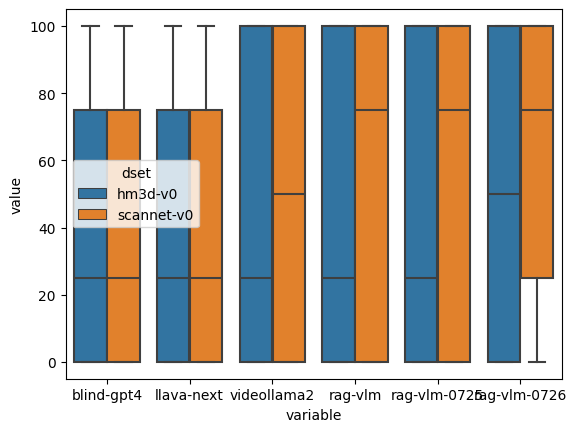

In [7]:
sns.boxplot(data=pdf, x='variable', y='value', hue='dset')

<Axes: xlabel='value', ylabel='variable'>

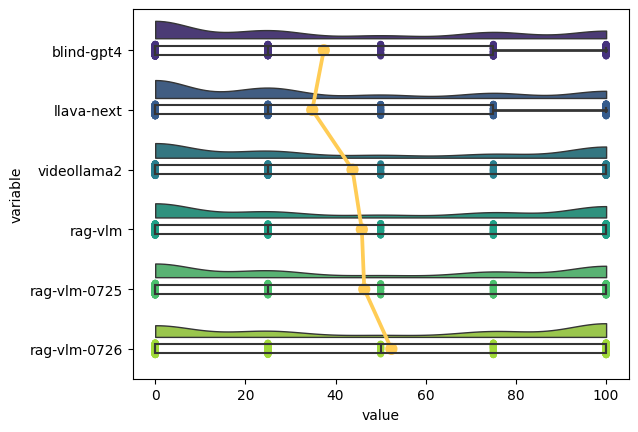

In [8]:
import ptitprince as pt
pt.RainCloud(
    data=pdf.loc[pdf['dset']=='hm3d-v0',:], x='variable', y ='value', palette='viridis', 
    width_viol=.6, orient='h', point_size=5, pointplot=True, linecolor="#FFCC55", jitter=1.0
)

<Axes: xlabel='value', ylabel='variable'>

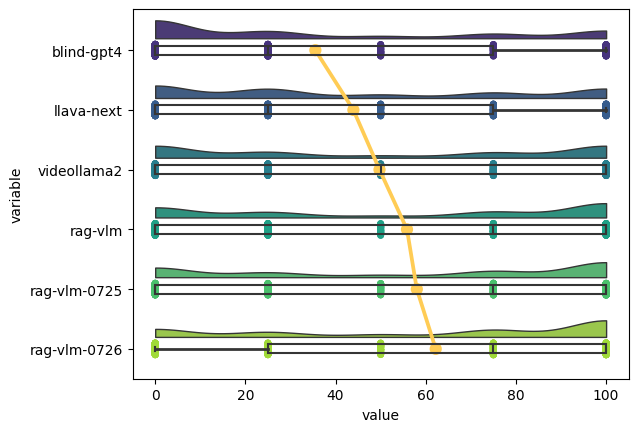

In [9]:
import ptitprince as pt
pt.RainCloud(
    data=pdf.loc[pdf['dset']=='scannet-v0',:], x='variable', y ='value', palette='viridis', 
    width_viol=.6, orient='h', point_size=5, pointplot=True, linecolor="#FFCC55", jitter=1.0
)

In [10]:
df.groupby('dset')[model_names].agg(['mean', 'std'])

blind-gpt4            llava-next            videollama2             \
                 mean        std       mean        std        mean        std   
dset                                                                            
hm3d-v0     37.387792  39.146107  34.829443  37.677847   43.761221  42.067632   
scannet-v0  35.518999  39.820555  43.952734  39.432037   49.745134  42.208895   

              rag-vlm            rag-vlm-0725            rag-vlm-0726  \
                 mean        std         mean        std         mean   
dset                                                                    
hm3d-v0     45.825853  42.189835    46.364452  42.133161    52.378815   
scannet-v0  55.838740  42.128172    58.016682  41.601249    62.210380   

                       
                  std  
dset                   
hm3d-v0     42.514768  
scannet-v0  39.984961

In [11]:
eqa_data = json.load(open('data/caree-eqa-v0.json'))
id2dset = {}
for row in eqa_data:
    id2dset[row['question_id']] = row['episode_history'].split('/')[0]

In [12]:
dfs = []
model_names = []
for path in list(filter(lambda x: 'dry_run' not in x, glob('data/metrics-caree/*.json'))):
    name = path.split('/')[-1].split('-predictions-')[0]
    df = pd.read_json(path, typ='series')
    df = df.to_frame(name).reset_index()
    df[name] = df[name].apply(lambda x: 100 * (np.clip(x, 1, 5) - 1) / 4)
    dfs.append(df)
    model_names.append(name)

In [13]:
df = dfs[0]
for i in range(1,len(dfs)):
    df = df.merge(dfs[i], on='index')

In [14]:
df['dset'] = df['index'].apply(lambda x: id2dset[x])

In [15]:
pdf = df.melt(['index','dset'], model_names)

<Axes: xlabel='variable', ylabel='value'>

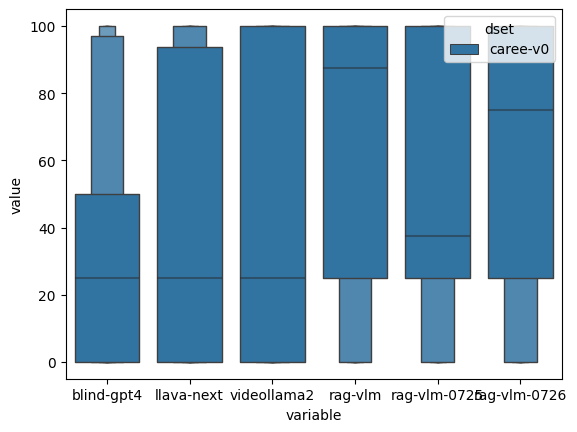

In [16]:
sns.boxenplot(data=pdf, x='variable', y='value', hue='dset', k_depth=7)

<Axes: xlabel='value', ylabel='variable'>

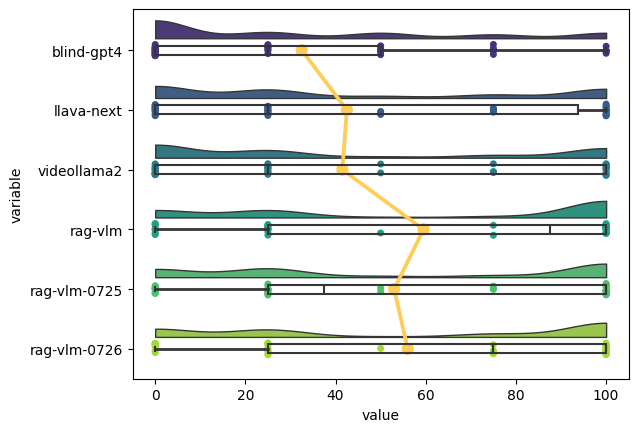

In [17]:
import ptitprince as pt
pt.RainCloud(
    data=pdf, x='variable', y ='value', palette='viridis', 
    width_viol=.6, orient='h', point_size=5, pointplot=True, linecolor="#FFCC55", jitter=1.0
)

In [18]:
df.groupby('dset')[model_names].agg(['mean', 'std'])

blind-gpt4           llava-next           videollama2             \
               mean       std       mean       std        mean        std   
dset                                                                        
caree-v0       32.5  37.20119       42.5  41.11023        41.5  42.441436   

         rag-vlm          rag-vlm-0725            rag-vlm-0726             
            mean      std         mean        std         mean        std  
dset                                                                       
caree-v0    59.5  43.7088         53.0  42.749866         56.0  43.023487